In [ ]:
#plot of regional statistics (latitude bands) for 11 driver sets used to reconstruct small (POC) and large (GOC)
#particulate organic carbon concentration 
#reults are estimated in RF_XGB_GlobalReconstruction_20092013_PlankTOM12_ADS_24112021

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#separation per zone
def zone_sep(Stat, main_df, Test_names,name_val,numb_name):
    for name in Test_names[:len(Test_names)-numb_name]:
        reg1_POC_RF = main_df[name_val+name].loc[main_df['lat'] > 60.].mean()
        reg2_POC_RF = main_df[name_val+name].loc[(main_df['lat'] > 40.) & (main_df['lat'] < 60.)].mean()    
        reg3_POC_RF = main_df[name_val+name].loc[(main_df['lat'] > 20.) & (main_df['lat'] < 40.)].mean()
        reg4_POC_RF = main_df[name_val+name].loc[(main_df['lat'] > -20.) & (main_df['lat'] < 20.)].mean()
        reg5_POC_RF = main_df[name_val+name].loc[(main_df['lat'] > -40.) & (main_df['lat'] < -20.)].mean()
        reg6_POC_RF = main_df[name_val+name].loc[(main_df['lat'] > -60.) & (main_df['lat'] < -40.)].mean()
        reg7_POC_RF = main_df[name_val+name].loc[main_df['lat'] < -60.].mean()    
        Stat[name_val+name] = [reg1_POC_RF,reg2_POC_RF,reg3_POC_RF,reg4_POC_RF,reg5_POC_RF,reg6_POC_RF,reg7_POC_RF]
        
    return Stat

In [3]:
#separation per zone
def zone_sep2(Stat, main_df, Test_names,name_val,numb_name):
    for name in Test_names[len(Test_names)-numb_name:]:
        reg1_POC_RF = main_df[name_val+name].loc[main_df['lat'] > 60.].mean()
        reg2_POC_RF = main_df[name_val+name].loc[(main_df['lat'] > 40.) & (main_df['lat'] < 60.)].mean()    
        reg3_POC_RF = main_df[name_val+name].loc[(main_df['lat'] > 20.) & (main_df['lat'] < 40.)].mean()
        reg4_POC_RF = main_df[name_val+name].loc[(main_df['lat'] > -20.) & (main_df['lat'] < 20.)].mean()
        reg5_POC_RF = main_df[name_val+name].loc[(main_df['lat'] > -40.) & (main_df['lat'] < -20.)].mean()
        reg6_POC_RF = main_df[name_val+name].loc[(main_df['lat'] > -60.) & (main_df['lat'] < -40.)].mean()
        reg7_POC_RF = main_df[name_val+name].loc[main_df['lat'] < -60.].mean()    
        Stat[name_val+name] = [reg1_POC_RF,reg2_POC_RF,reg3_POC_RF,reg4_POC_RF,reg5_POC_RF,reg6_POC_RF,reg7_POC_RF]
        
    return Stat

In [4]:
def Plot_bar(df,y_label,filename):
    # Plot a bar chart using the DF
    ax = df.plot(kind="bar",rot=20,legend=False)
    # Get a Matplotlib figure from the axes object for formatting purposes
    fig = ax.get_figure()
    # Change the plot dimensions (width, height)
    fig.set_size_inches(12, 14)
    # Change the axes labels
    ax.set_ylabel(y_label,fontsize=20)
    ax.set_xlabel("Regions",fontsize=20)
    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=20)
    # Use this to show the plot in a new window
    plt.show()
    # Export the plot as a PNG file
    fig.savefig("/Figures_Article/"+filename+".png")

In [5]:
#driver sets' names
Test_names_GOC = ['_NoPFT','_PhZMLD','_PhZBACMLD','_PhZMLD_latlon','_PhZMLD_day','_PhZMLD_only','_PhZMLD_CHL','_PhZMLD_PO4','_PhZMLD_back1','_PhZMLD_back2','_PhZMLD_back3']
Test_names_POC = ['_NoPFT','_PhZMLD','_PhZMLD_CHL','_PhZMLD_NO3','_PhZMLD_PO4','_PhZMLD_chim','_PhZMLD_latlon','_PhZMLD_day','_PhZMLD_back1','_PhZMLD_back2','_PhZMLD_back3']

In [28]:
#read data
PlankTOM_20092013 = pd.read_csv('/Volumes/LaCie/Data_UEA/POC_GOC_reconstruction_20092013/Data_Article/PlankTOM_20092013.csv')
PlankTOM_20092013_back = pd.read_csv('/Volumes/LaCie/Data_UEA/POC_GOC_reconstruction_20092013/Data_Article/PlankTOM_20092013_back.csv')

In [29]:
PlankTOM_20092013['POC'] = pd.read_csv('/Volumes/LaCie/Data_UEA/POC_GOC_reconstruction_20092013/Data_Article/PlankTOM_20092013_POC.csv')['POC']
PlankTOM_20092013_back['POC'] = pd.read_csv('/Volumes/LaCie/Data_UEA/POC_GOC_reconstruction_20092013/Data_Article/PlankTOM_20092013_back_POC.csv')['POC']

In [30]:
for name in Test_names_POC[:len(Test_names_POC)-3]:
    PlankTOM_20092013['POC_RF'+name]  = pd.read_csv('/Volumes/LaCie/Data_UEA/POC_GOC_reconstruction_20092013/Data_Article/POC_prediction_20092013_RF'+name+'_2.csv')['POC']
    PlankTOM_20092013['POC_xgb'+name] = pd.read_csv('/Volumes/LaCie/Data_UEA/POC_GOC_reconstruction_20092013/Data_Article/POC_prediction_20092013_xgb'+name+'_2.csv')['POC']

for name in Test_names_POC[len(Test_names_POC)-3:]:
    PlankTOM_20092013_back['POC_RF'+name]  = pd.read_csv('/Volumes/LaCie/Data_UEA/POC_GOC_reconstruction_20092013/Data_Article/POC_prediction_20092013_RF'+name+'_2.csv')['POC']
    PlankTOM_20092013_back['POC_xgb'+name] = pd.read_csv('/Volumes/LaCie/Data_UEA/POC_GOC_reconstruction_20092013/Data_Article/POC_prediction_20092013_xgb'+name+'_2.csv')['POC']
  

In [31]:
for name in Test_names_GOC[:len(Test_names_GOC)-3]:
    PlankTOM_20092013['GOC_RF'+name]  = pd.read_csv('/Volumes/LaCie/Data_UEA/POC_GOC_reconstruction_20092013/Data_Article/GOC_prediction_20092013_RF'+name+'_3.csv')['GOC']
    PlankTOM_20092013['GOC_xgb'+name] = pd.read_csv('/Volumes/LaCie/Data_UEA/POC_GOC_reconstruction_20092013/Data_Article/GOC_prediction_20092013_xgb'+name+'_3.csv')['GOC']

for name in Test_names_GOC[len(Test_names_GOC)-3:]:
    PlankTOM_20092013_back['GOC_RF'+name]  = pd.read_csv('/Volumes/LaCie/Data_UEA/POC_GOC_reconstruction_20092013/Data_Article/GOC_prediction_20092013_RF'+name+'_3.csv')['GOC']
    PlankTOM_20092013_back['GOC_xgb'+name] = pd.read_csv('/Volumes/LaCie/Data_UEA/POC_GOC_reconstruction_20092013/Data_Article/GOC_prediction_20092013_xgb'+name+'_3.csv')['GOC']
  

In [32]:
PlankTOM_20092013.std()

Unnamed: 0               1.219021e+06
GOC                      4.310692e-02
depth                    3.273150e+02
lat                      4.342297e+01
lon                      1.095019e+02
month                    3.452051e+00
year                     1.414213e+00
POC                      4.016535e-01
POC_RF_NoPFT             4.096903e-01
POC_xgb_NoPFT            3.567672e-01
POC_RF_PhZMLD            3.905611e-01
POC_xgb_PhZMLD           3.860593e-01
POC_RF_PhZMLD_CHL        3.884705e-01
POC_xgb_PhZMLD_CHL       3.843476e-01
POC_RF_PhZMLD_NO3        3.919687e-01
POC_xgb_PhZMLD_NO3       3.890779e-01
POC_RF_PhZMLD_PO4        3.920550e-01
POC_xgb_PhZMLD_PO4       3.870361e-01
POC_RF_PhZMLD_chim       3.913695e-01
POC_xgb_PhZMLD_chim      3.862092e-01
POC_RF_PhZMLD_latlon     3.873695e-01
POC_xgb_PhZMLD_latlon    3.833193e-01
POC_RF_PhZMLD_day        3.904920e-01
POC_xgb_PhZMLD_day       3.869335e-01
GOC_RF_NoPFT             3.015588e-02
GOC_xgb_NoPFT            2.888291e-02
GOC_RF_PhZML

In [33]:
PlankTOM_20092013_back.std()

Unnamed: 0              1.115588e+06
GOC                     4.301435e-02
depth                   3.273761e+02
lat                     4.327880e+01
lon                     1.095318e+02
month                   3.162274e+00
year                    1.414213e+00
POC                     4.039159e-01
POC_RF_PhZMLD_back1     3.864935e-01
POC_xgb_PhZMLD_back1    3.861032e-01
POC_RF_PhZMLD_back2     3.863462e-01
POC_xgb_PhZMLD_back2    3.854661e-01
POC_RF_PhZMLD_back3     3.898251e-01
POC_xgb_PhZMLD_back3    3.849444e-01
GOC_RF_PhZMLD_back1     3.093691e-02
GOC_xgb_PhZMLD_back1    2.860907e-02
GOC_RF_PhZMLD_back2     3.060198e-02
GOC_xgb_PhZMLD_back2    2.849390e-02
GOC_RF_PhZMLD_back3     2.879870e-02
GOC_xgb_PhZMLD_back3    2.942816e-02
dtype: float64

In [10]:
#estimation of correlation coefficient
Corr_20092013 = PlankTOM_20092013.groupby(['lat','lon']).mean().reset_index()[['lat','lon']]
Corr_20092013_back = PlankTOM_20092013_back.groupby(['lat','lon']).mean().reset_index()[['lat','lon']]

for name in Test_names_POC[:len(Test_names_POC)-3]:
    Corr_20092013['Corr_POC_RF'+name]  = PlankTOM_20092013.groupby(['lat','lon'])[['POC','POC_RF'+name]].corr().iloc[0::2,-1].reset_index()['POC_RF'+name]
    Corr_20092013['Corr_POC_xgb'+name] = PlankTOM_20092013.groupby(['lat','lon'])[['POC','POC_xgb'+name]].corr().iloc[0::2,-1].reset_index()['POC_xgb'+name]

for name in Test_names_POC[len(Test_names_POC)-3:]:
    Corr_20092013_back['Corr_POC_RF'+name]  = PlankTOM_20092013_back.groupby(['lat','lon'])[['POC','POC_RF'+name]].corr().iloc[0::2,-1].reset_index()['POC_RF'+name]
    Corr_20092013_back['Corr_POC_xgb'+name] = PlankTOM_20092013_back.groupby(['lat','lon'])[['POC','POC_xgb'+name]].corr().iloc[0::2,-1].reset_index()['POC_xgb'+name]

In [11]:
for name in Test_names_GOC[:len(Test_names_GOC)-3]:
    Corr_20092013['Corr_GOC_RF'+name]  = PlankTOM_20092013.groupby(['lat','lon'])[['GOC','GOC_RF'+name]].corr().iloc[0::2,-1].reset_index()['GOC_RF'+name]
    Corr_20092013['Corr_GOC_xgb'+name] = PlankTOM_20092013.groupby(['lat','lon'])[['GOC','GOC_xgb'+name]].corr().iloc[0::2,-1].reset_index()['GOC_xgb'+name]

for name in Test_names_GOC[len(Test_names_GOC)-3:]:
    Corr_20092013_back['Corr_GOC_RF'+name]  = PlankTOM_20092013_back.groupby(['lat','lon'])[['GOC','GOC_RF'+name]].corr().iloc[0::2,-1].reset_index()['GOC_RF'+name]
    Corr_20092013_back['Corr_GOC_xgb'+name] = PlankTOM_20092013_back.groupby(['lat','lon'])[['GOC','GOC_xgb'+name]].corr().iloc[0::2,-1].reset_index()['GOC_xgb'+name]

In [12]:
Diff_20092013 = PlankTOM_20092013.groupby(['lat','lon']).mean().reset_index()[['lat','lon']]
Diff_20092013_back = PlankTOM_20092013_back.groupby(['lat','lon']).mean().reset_index()[['lat','lon']]

In [13]:
#estimation of absolute bias
for name in Test_names_POC[:len(Test_names_POC)-3]:
    PlankTOM_20092013['Diff_POC_RF'+name]  = np.abs(PlankTOM_20092013['POC_RF'+name] - PlankTOM_20092013['POC'])
    PlankTOM_20092013['Diff_POC_xgb'+name] = np.abs(PlankTOM_20092013['POC_xgb'+name] - PlankTOM_20092013['POC'])

for name in Test_names_POC[len(Test_names_POC)-3:]:
    PlankTOM_20092013_back['Diff_POC_RF'+name]  = np.abs(PlankTOM_20092013_back['POC_RF'+name] - PlankTOM_20092013_back['POC'])
    PlankTOM_20092013_back['Diff_POC_xgb'+name] = np.abs(PlankTOM_20092013_back['POC_xgb'+name] - PlankTOM_20092013_back['POC'])

for name in Test_names_GOC[:len(Test_names_GOC)-3]:
    PlankTOM_20092013['Diff_GOC_RF'+name]  = np.abs(PlankTOM_20092013['GOC_RF'+name] - PlankTOM_20092013['GOC'])
    PlankTOM_20092013['Diff_GOC_xgb'+name] = np.abs(PlankTOM_20092013['GOC_xgb'+name] - PlankTOM_20092013['GOC'])

for name in Test_names_GOC[len(Test_names_GOC)-3:]:
    PlankTOM_20092013_back['Diff_GOC_RF'+name]  = np.abs(PlankTOM_20092013_back['GOC_RF'+name] - PlankTOM_20092013_back['GOC'])
    PlankTOM_20092013_back['Diff_GOC_xgb'+name] = np.abs(PlankTOM_20092013_back['GOC_xgb'+name] - PlankTOM_20092013_back['GOC'])


In [14]:
for name in Test_names_POC[:len(Test_names_POC)-3]:
    PlankTOM_20092013['Diff_Sq_POC_RF'+name]  = ((PlankTOM_20092013['POC_RF'+name] - PlankTOM_20092013['POC'])**2)
    PlankTOM_20092013['Diff_Sq_POC_xgb'+name] = ((PlankTOM_20092013['POC_xgb'+name] - PlankTOM_20092013['POC'])**2)

for name in Test_names_POC[len(Test_names_POC)-3:]:
    PlankTOM_20092013_back['Diff_Sq_POC_RF'+name]  = ((PlankTOM_20092013_back['POC_RF'+name] - PlankTOM_20092013_back['POC'])**2)
    PlankTOM_20092013_back['Diff_Sq_POC_xgb'+name] = ((PlankTOM_20092013_back['POC_xgb'+name] - PlankTOM_20092013_back['POC'])**2)

for name in Test_names_GOC[:len(Test_names_GOC)-3]:
    PlankTOM_20092013['Diff_Sq_GOC_RF'+name]  = ((PlankTOM_20092013['GOC_RF'+name] - PlankTOM_20092013['GOC'])**2)
    PlankTOM_20092013['Diff_Sq_GOC_xgb'+name] = ((PlankTOM_20092013['GOC_xgb'+name] - PlankTOM_20092013['GOC'])**2)

for name in Test_names_GOC[len(Test_names_GOC)-3:]:
    PlankTOM_20092013_back['Diff_Sq_GOC_RF'+name]  = ((PlankTOM_20092013_back['GOC_RF'+name] - PlankTOM_20092013_back['GOC'])**2)
    PlankTOM_20092013_back['Diff_Sq_GOC_xgb'+name] = ((PlankTOM_20092013_back['GOC_xgb'+name] - PlankTOM_20092013_back['GOC'])**2)

In [15]:
mean_1 = PlankTOM_20092013.groupby(['lat','lon']).mean().reset_index()
mean_back = PlankTOM_20092013_back.groupby(['lat','lon']).mean().reset_index()

In [16]:
for name in Test_names_POC[:len(Test_names_POC)-3]:
    Diff_20092013['Diff_POC_RF'+name]  = mean_1[['Diff_POC_RF'+name]]
    Diff_20092013['Diff_POC_xgb'+name] = mean_1[['Diff_POC_xgb'+name]]

for name in Test_names_POC[len(Test_names_POC)-3:]:
    Diff_20092013_back['Diff_POC_RF'+name]  = mean_back[['Diff_POC_RF'+name]]
    Diff_20092013_back['Diff_POC_xgb'+name] = mean_back[['Diff_POC_xgb'+name]]

for name in Test_names_GOC[:len(Test_names_GOC)-3]:
    Diff_20092013['Diff_GOC_RF'+name]  = mean_1[['Diff_GOC_RF'+name]]
    Diff_20092013['Diff_GOC_xgb'+name] = mean_1[['Diff_GOC_xgb'+name]]

for name in Test_names_GOC[len(Test_names_GOC)-3:]:
    Diff_20092013_back['Diff_GOC_RF'+name]  = mean_back[['Diff_GOC_RF'+name]]
    Diff_20092013_back['Diff_GOC_xgb'+name] = mean_back[['Diff_GOC_xgb'+name]]


In [17]:
for name in Test_names_POC[:len(Test_names_POC)-3]:
    Diff_20092013['Diff_Sq_POC_RF'+name]  = mean_1[['Diff_Sq_POC_RF'+name]]
    Diff_20092013['Diff_Sq_POC_xgb'+name] = mean_1[['Diff_Sq_POC_xgb'+name]]

for name in Test_names_POC[len(Test_names_POC)-3:]:
    Diff_20092013_back['Diff_Sq_POC_RF'+name]  = mean_back[['Diff_Sq_POC_RF'+name]]
    Diff_20092013_back['Diff_Sq_POC_xgb'+name] = mean_back[['Diff_Sq_POC_xgb'+name]]

for name in Test_names_GOC[:len(Test_names_GOC)-3]:
    Diff_20092013['Diff_Sq_GOC_RF'+name]  = mean_1[['Diff_Sq_GOC_RF'+name]]
    Diff_20092013['Diff_Sq_GOC_xgb'+name] = mean_1[['Diff_Sq_GOC_xgb'+name]]

for name in Test_names_GOC[len(Test_names_GOC)-3:]:
    Diff_20092013_back['Diff_Sq_GOC_RF'+name]  = mean_back[['Diff_Sq_GOC_RF'+name]]
    Diff_20092013_back['Diff_Sq_GOC_xgb'+name] = mean_back[['Diff_Sq_GOC_xgb'+name]]


In [18]:
Corr_20092013.mean()

lat                          -9.886491
lon                          -9.892951
Corr_POC_RF_NoPFT             0.578057
Corr_POC_xgb_NoPFT            0.582715
Corr_POC_RF_PhZMLD            0.876642
Corr_POC_xgb_PhZMLD           0.870381
Corr_POC_RF_PhZMLD_CHL        0.878447
Corr_POC_xgb_PhZMLD_CHL       0.869621
Corr_POC_RF_PhZMLD_NO3        0.870635
Corr_POC_xgb_PhZMLD_NO3       0.869077
Corr_POC_RF_PhZMLD_PO4        0.866091
Corr_POC_xgb_PhZMLD_PO4       0.872039
Corr_POC_RF_PhZMLD_chim       0.869406
Corr_POC_xgb_PhZMLD_chim      0.868227
Corr_POC_RF_PhZMLD_latlon     0.849788
Corr_POC_xgb_PhZMLD_latlon    0.870192
Corr_POC_RF_PhZMLD_day        0.877481
Corr_POC_xgb_PhZMLD_day       0.864192
Corr_GOC_RF_NoPFT             0.561765
Corr_GOC_xgb_NoPFT            0.563145
Corr_GOC_RF_PhZMLD            0.631879
Corr_GOC_xgb_PhZMLD           0.682050
Corr_GOC_RF_PhZBACMLD         0.630085
Corr_GOC_xgb_PhZBACMLD        0.677087
Corr_GOC_RF_PhZMLD_latlon     0.630130
Corr_GOC_xgb_PhZMLD_latlo

In [19]:
Corr_20092013_back.mean()

lat                         -9.887124
lon                         -9.890505
Corr_POC_RF_PhZMLD_back1     0.853676
Corr_POC_xgb_PhZMLD_back1    0.878731
Corr_POC_RF_PhZMLD_back2     0.853288
Corr_POC_xgb_PhZMLD_back2    0.880413
Corr_POC_RF_PhZMLD_back3     0.875711
Corr_POC_xgb_PhZMLD_back3    0.867106
Corr_GOC_RF_PhZMLD_back1     0.630812
Corr_GOC_xgb_PhZMLD_back1    0.685873
Corr_GOC_RF_PhZMLD_back2     0.629413
Corr_GOC_xgb_PhZMLD_back2    0.678422
Corr_GOC_RF_PhZMLD_back3     0.637510
Corr_GOC_xgb_PhZMLD_back3    0.671958
dtype: float64

In [ ]:
#dataframe for averages over latitude bands statistics

In [23]:
Stat_20092013 = pd.DataFrame({'regions': ['90⁰N-60⁰N','60⁰N-40⁰N','40⁰N-20⁰N','20⁰N-20⁰S','20⁰S-40⁰S','40⁰S-60⁰S','60⁰S-90⁰S']}, columns=['regions'])

In [24]:
Stat_20092013 = Stat_20092013.set_index('regions')

In [25]:
Stat_20092013

""
regions
90⁰N-60⁰N
60⁰N-40⁰N
40⁰N-20⁰N
20⁰N-20⁰S
20⁰S-40⁰S
40⁰S-60⁰S
60⁰S-90⁰S


In [26]:
#averages of correlation over latitude bands
zone_sep(Stat_20092013, Corr_20092013, Test_names_POC,'Corr_POC_RF',3)
zone_sep2(Stat_20092013, Corr_20092013_back, Test_names_POC,'Corr_POC_RF',3)
zone_sep(Stat_20092013, Corr_20092013, Test_names_POC,'Corr_POC_xgb',3)
zone_sep2(Stat_20092013, Corr_20092013_back, Test_names_POC,'Corr_POC_xgb',3)

zone_sep(Stat_20092013, Corr_20092013, Test_names_GOC,'Corr_GOC_RF',3)
zone_sep2(Stat_20092013, Corr_20092013_back, Test_names_GOC,'Corr_GOC_RF',3)
zone_sep(Stat_20092013, Corr_20092013, Test_names_GOC,'Corr_GOC_xgb',3)
zone_sep2(Stat_20092013, Corr_20092013_back, Test_names_GOC,'Corr_GOC_xgb',3)

,Corr_POC_RF_NoPFT,Corr_POC_RF_PhZMLD,Corr_POC_RF_PhZMLD_CHL,Corr_POC_RF_PhZMLD_NO3,Corr_POC_RF_PhZMLD_PO4,Corr_POC_RF_PhZMLD_chim,Corr_POC_RF_PhZMLD_latlon,Corr_POC_RF_PhZMLD_day,Corr_POC_RF_PhZMLD_back1,Corr_POC_RF_PhZMLD_back2,...,Corr_GOC_xgb_PhZMLD,Corr_GOC_xgb_PhZBACMLD,Corr_GOC_xgb_PhZMLD_latlon,Corr_GOC_xgb_PhZMLD_day,Corr_GOC_xgb_PhZMLD_only,Corr_GOC_xgb_PhZMLD_CHL,Corr_GOC_xgb_PhZMLD_PO4,Corr_GOC_xgb_PhZMLD_back1,Corr_GOC_xgb_PhZMLD_back2,Corr_GOC_xgb_PhZMLD_back3
regions,,,,,,,,,,,,,,,,,,,,,
90⁰N-60⁰N,0.208102,0.826935,0.829099,0.814016,0.814032,0.818171,0.806629,0.824809,0.823558,0.823895,...,0.542016,0.546151,0.530878,0.533526,0.534459,0.528324,0.534740,0.552220,0.556415,0.517840
60⁰N-40⁰N,0.254674,0.873485,0.875639,0.874916,0.872344,0.874196,0.877849,0.873862,0.879329,0.878775,...,0.605859,0.599162,0.596830,0.578250,0.578646,0.593481,0.577053,0.632217,0.618999,0.617797
40⁰N-20⁰N,0.744748,0.957552,0.957949,0.957142,0.957156,0.958189,0.957637,0.957240,0.956291,0.956510,...,0.736415,0.734561,0.740684,0.733890,0.721452,0.760526,0.758967,0.743892,0.743027,0.756011
20⁰N-20⁰S,0.894182,0.969328,0.969333,0.969200,0.968821,0.969361,0.970106,0.969311,0.968944,0.968781,...,0.838895,0.835864,0.840575,0.837098,0.833457,0.827316,0.846407,0.842818,0.842882,0.825405
20⁰S-40⁰S,0.686372,0.954476,0.954945,0.954241,0.952461,0.953827,0.954961,0.954511,0.959403,0.959701,...,0.789360,0.787741,0.784637,0.784486,0.777122,0.786017,0.791610,0.791164,0.791663,0.779725
40⁰S-60⁰S,0.297518,0.853751,0.859816,0.854814,0.846996,0.865721,0.833802,0.859694,0.837821,0.838346,...,0.642305,0.634949,0.632081,0.634657,0.652813,0.566407,0.608082,0.660302,0.642878,0.588189
60⁰S-90⁰S,0.482186,0.671391,0.673295,0.641608,0.625417,0.620540,0.539309,0.671472,0.548474,0.545699,...,0.452884,0.438992,0.426060,0.424764,0.451125,0.502813,0.421600,0.427883,0.404851,0.477613


In [20]:
%reset_selective -f Corr_20092013
%reset_selective -f Corr_20092013_back
%reset_selective -f PlankTOM_20092013
%reset_selective -f PlankTOM_20092013_back


In [21]:
PlankTOM_20092013_mean = Diff_20092013.groupby(['lat','lon']).mean().reset_index()
PlankTOM_20092013_back_mean = Diff_20092013_back.groupby(['lat','lon']).mean().reset_index()

In [22]:
#estimation of RMSE
for name in Test_names_POC[:len(Test_names_POC)-3]:
    PlankTOM_20092013_mean['RMSE_POC_RF'+name]  = np.sqrt(PlankTOM_20092013_mean['Diff_Sq_POC_RF'+name])
    PlankTOM_20092013_mean['RMSE_POC_xgb'+name] = np.sqrt(PlankTOM_20092013_mean['Diff_Sq_POC_xgb'+name])

for name in Test_names_POC[len(Test_names_POC)-3:]:
    PlankTOM_20092013_back_mean['RMSE_POC_RF'+name]  = np.sqrt(PlankTOM_20092013_back_mean['Diff_Sq_POC_RF'+name])
    PlankTOM_20092013_back_mean['RMSE_POC_xgb'+name] = np.sqrt(PlankTOM_20092013_back_mean['Diff_Sq_POC_xgb'+name])

for name in Test_names_GOC[:len(Test_names_GOC)-3]:
    PlankTOM_20092013_mean['RMSE_GOC_RF'+name]  = np.sqrt(PlankTOM_20092013_mean['Diff_Sq_GOC_RF'+name])
    PlankTOM_20092013_mean['RMSE_GOC_xgb'+name] = np.sqrt(PlankTOM_20092013_mean['Diff_Sq_GOC_xgb'+name])

for name in Test_names_GOC[len(Test_names_GOC)-3:]:
    PlankTOM_20092013_back_mean['RMSE_GOC_RF'+name]  = np.sqrt(PlankTOM_20092013_back_mean['Diff_Sq_GOC_RF'+name])
    PlankTOM_20092013_back_mean['RMSE_GOC_xgb'+name] = np.sqrt(PlankTOM_20092013_back_mean['Diff_Sq_GOC_xgb'+name])

In [27]:
PlankTOM_20092013_mean.mean()[:50]

lat                             -9.886491
lon                             -9.892951
Diff_POC_RF_NoPFT                0.142078
Diff_POC_xgb_NoPFT               0.130147
Diff_POC_RF_PhZMLD               0.048183
Diff_POC_xgb_PhZMLD              0.053650
Diff_POC_RF_PhZMLD_CHL           0.047448
Diff_POC_xgb_PhZMLD_CHL          0.052519
Diff_POC_RF_PhZMLD_NO3           0.046748
Diff_POC_xgb_PhZMLD_NO3          0.050365
Diff_POC_RF_PhZMLD_PO4           0.047560
Diff_POC_xgb_PhZMLD_PO4          0.050589
Diff_POC_RF_PhZMLD_chim          0.046772
Diff_POC_xgb_PhZMLD_chim         0.049323
Diff_POC_RF_PhZMLD_latlon        0.049815
Diff_POC_xgb_PhZMLD_latlon       0.053884
Diff_POC_RF_PhZMLD_day           0.047732
Diff_POC_xgb_PhZMLD_day          0.052645
Diff_GOC_RF_NoPFT                0.024109
Diff_GOC_xgb_NoPFT               0.027714
Diff_GOC_RF_PhZMLD               0.022618
Diff_GOC_xgb_PhZMLD              0.022531
Diff_GOC_RF_PhZBACMLD            0.022801
Diff_GOC_xgb_PhZBACMLD           0

In [26]:
PlankTOM_20092013_back_mean.mean()

lat                            -9.887124
lon                            -9.890505
Diff_POC_RF_PhZMLD_back1        0.047639
Diff_POC_xgb_PhZMLD_back1       0.047971
Diff_POC_RF_PhZMLD_back2        0.047891
Diff_POC_xgb_PhZMLD_back2       0.048358
Diff_POC_RF_PhZMLD_back3        0.048451
Diff_POC_xgb_PhZMLD_back3       0.053484
Diff_GOC_RF_PhZMLD_back1        0.022246
Diff_GOC_xgb_PhZMLD_back1       0.021909
Diff_GOC_RF_PhZMLD_back2        0.022281
Diff_GOC_xgb_PhZMLD_back2       0.022204
Diff_GOC_RF_PhZMLD_back3        0.020684
Diff_GOC_xgb_PhZMLD_back3       0.022171
Diff_Sq_POC_RF_PhZMLD_back1     0.017644
Diff_Sq_POC_xgb_PhZMLD_back1    0.016296
Diff_Sq_POC_RF_PhZMLD_back2     0.017797
Diff_Sq_POC_xgb_PhZMLD_back2    0.016478
Diff_Sq_POC_RF_PhZMLD_back3     0.017664
Diff_Sq_POC_xgb_PhZMLD_back3    0.017315
Diff_Sq_GOC_RF_PhZMLD_back1     0.002225
Diff_Sq_GOC_xgb_PhZMLD_back1    0.002122
Diff_Sq_GOC_RF_PhZMLD_back2     0.002226
Diff_Sq_GOC_xgb_PhZMLD_back2    0.002121
Diff_Sq_GOC_RF_P

In [30]:
#averages of absolute bias over latitude bands
zone_sep(Stat_20092013, PlankTOM_20092013_mean, Test_names_POC,'Diff_POC_RF',3)
zone_sep2(Stat_20092013, PlankTOM_20092013_back_mean, Test_names_POC,'Diff_POC_RF',3)
zone_sep(Stat_20092013, PlankTOM_20092013_mean, Test_names_POC,'Diff_POC_xgb',3)
zone_sep2(Stat_20092013, PlankTOM_20092013_back_mean, Test_names_POC,'Diff_POC_xgb',3)

zone_sep(Stat_20092013, PlankTOM_20092013_mean, Test_names_GOC,'Diff_GOC_RF',3)
zone_sep2(Stat_20092013, PlankTOM_20092013_back_mean, Test_names_GOC,'Diff_GOC_RF',3)
zone_sep(Stat_20092013, PlankTOM_20092013_mean, Test_names_GOC,'Diff_GOC_xgb',3)
zone_sep2(Stat_20092013, PlankTOM_20092013_back_mean, Test_names_GOC,'Diff_GOC_xgb',3)

,Corr_POC_RF_NoPFT,Corr_POC_RF_PhZMLD,Corr_POC_RF_PhZMLD_CHL,Corr_POC_RF_PhZMLD_NO3,Corr_POC_RF_PhZMLD_PO4,Corr_POC_RF_PhZMLD_chim,Corr_POC_RF_PhZMLD_latlon,Corr_POC_RF_PhZMLD_day,Corr_POC_RF_PhZMLD_back1,Corr_POC_RF_PhZMLD_back2,...,Diff_GOC_xgb_PhZMLD,Diff_GOC_xgb_PhZBACMLD,Diff_GOC_xgb_PhZMLD_latlon,Diff_GOC_xgb_PhZMLD_day,Diff_GOC_xgb_PhZMLD_only,Diff_GOC_xgb_PhZMLD_CHL,Diff_GOC_xgb_PhZMLD_PO4,Diff_GOC_xgb_PhZMLD_back1,Diff_GOC_xgb_PhZMLD_back2,Diff_GOC_xgb_PhZMLD_back3
regions,,,,,,,,,,,,,,,,,,,,,
90⁰N-60⁰N,0.208102,0.826935,0.829099,0.814016,0.814032,0.818171,0.806629,0.824809,0.823558,0.823895,...,0.030591,0.030933,0.029293,0.030765,0.032120,0.030007,0.032426,0.030621,0.030735,0.031887
60⁰N-40⁰N,0.254674,0.873485,0.875639,0.874916,0.872344,0.874196,0.877849,0.873862,0.879329,0.878775,...,0.030586,0.030923,0.030378,0.031193,0.030293,0.030411,0.032603,0.029077,0.029324,0.029883
40⁰N-20⁰N,0.744748,0.957552,0.957949,0.957142,0.957156,0.958189,0.957637,0.957240,0.956291,0.956510,...,0.019409,0.019994,0.019244,0.020060,0.019893,0.019293,0.019176,0.018532,0.019026,0.018609
20⁰N-20⁰S,0.894182,0.969328,0.969333,0.969200,0.968821,0.969361,0.970106,0.969311,0.968944,0.968781,...,0.018631,0.018804,0.018615,0.018751,0.019011,0.018871,0.018186,0.018372,0.018176,0.018809
20⁰S-40⁰S,0.686372,0.954476,0.954945,0.954241,0.952461,0.953827,0.954961,0.954511,0.959403,0.959701,...,0.017373,0.017724,0.017949,0.017861,0.017182,0.016636,0.017795,0.016746,0.016921,0.016717
40⁰S-60⁰S,0.297518,0.853751,0.859816,0.854814,0.846996,0.865721,0.833802,0.859694,0.837821,0.838346,...,0.020079,0.020766,0.020865,0.020712,0.020044,0.021351,0.022399,0.019408,0.019949,0.020683
60⁰S-90⁰S,0.482186,0.671391,0.673295,0.641608,0.625417,0.620540,0.539309,0.671472,0.548474,0.545699,...,0.028829,0.030107,0.031080,0.030631,0.029951,0.027016,0.031865,0.027737,0.028792,0.026097


In [31]:
#averages of RMSE over latitude bands
zone_sep(Stat_20092013, PlankTOM_20092013_mean, Test_names_POC,'RMSE_POC_RF',3)
zone_sep2(Stat_20092013, PlankTOM_20092013_back_mean, Test_names_POC,'RMSE_POC_RF',3)
zone_sep(Stat_20092013, PlankTOM_20092013_mean, Test_names_POC,'RMSE_POC_xgb',3)
zone_sep2(Stat_20092013, PlankTOM_20092013_back_mean, Test_names_POC,'RMSE_POC_xgb',3)

zone_sep(Stat_20092013, PlankTOM_20092013_mean, Test_names_GOC,'RMSE_GOC_RF',3)
zone_sep2(Stat_20092013, PlankTOM_20092013_back_mean, Test_names_GOC,'RMSE_GOC_RF',3)
zone_sep(Stat_20092013, PlankTOM_20092013_mean, Test_names_GOC,'RMSE_GOC_xgb',3)
zone_sep2(Stat_20092013, PlankTOM_20092013_back_mean, Test_names_GOC,'RMSE_GOC_xgb',3)

,Corr_POC_RF_NoPFT,Corr_POC_RF_PhZMLD,Corr_POC_RF_PhZMLD_CHL,Corr_POC_RF_PhZMLD_NO3,Corr_POC_RF_PhZMLD_PO4,Corr_POC_RF_PhZMLD_chim,Corr_POC_RF_PhZMLD_latlon,Corr_POC_RF_PhZMLD_day,Corr_POC_RF_PhZMLD_back1,Corr_POC_RF_PhZMLD_back2,...,RMSE_GOC_xgb_PhZMLD,RMSE_GOC_xgb_PhZBACMLD,RMSE_GOC_xgb_PhZMLD_latlon,RMSE_GOC_xgb_PhZMLD_day,RMSE_GOC_xgb_PhZMLD_only,RMSE_GOC_xgb_PhZMLD_CHL,RMSE_GOC_xgb_PhZMLD_PO4,RMSE_GOC_xgb_PhZMLD_back1,RMSE_GOC_xgb_PhZMLD_back2,RMSE_GOC_xgb_PhZMLD_back3
regions,,,,,,,,,,,,,,,,,,,,,
90⁰N-60⁰N,0.208102,0.826935,0.829099,0.814016,0.814032,0.818171,0.806629,0.824809,0.823558,0.823895,...,0.045692,0.045749,0.044379,0.045473,0.046149,0.045688,0.046601,0.046034,0.045576,0.047895
60⁰N-40⁰N,0.254674,0.873485,0.875639,0.874916,0.872344,0.874196,0.877849,0.873862,0.879329,0.878775,...,0.040048,0.040435,0.039961,0.040802,0.040137,0.040301,0.042195,0.038603,0.038898,0.039515
40⁰N-20⁰N,0.744748,0.957552,0.957949,0.957142,0.957156,0.958189,0.957637,0.957240,0.956291,0.956510,...,0.025109,0.025660,0.024850,0.025669,0.025654,0.024951,0.024404,0.024127,0.024612,0.024228
20⁰N-20⁰S,0.894182,0.969328,0.969333,0.969200,0.968821,0.969361,0.970106,0.969311,0.968944,0.968781,...,0.024879,0.025006,0.024839,0.024943,0.025296,0.025239,0.024122,0.024664,0.024392,0.025240
20⁰S-40⁰S,0.686372,0.954476,0.954945,0.954241,0.952461,0.953827,0.954961,0.954511,0.959403,0.959701,...,0.022437,0.022714,0.023132,0.022896,0.022220,0.021634,0.022750,0.021649,0.021714,0.021557
40⁰S-60⁰S,0.297518,0.853751,0.859816,0.854814,0.846996,0.865721,0.833802,0.859694,0.837821,0.838346,...,0.024906,0.025630,0.025703,0.025476,0.024693,0.026920,0.027696,0.024130,0.024650,0.026014
60⁰S-90⁰S,0.482186,0.671391,0.673295,0.641608,0.625417,0.620540,0.539309,0.671472,0.548474,0.545699,...,0.035365,0.036214,0.036931,0.036641,0.036021,0.034308,0.037496,0.033709,0.034526,0.032751


In [32]:
#datframes to plot results separatly for Random Forest and XGBoost and for different statistics
Stat_20092013_RMSE_POC_RF = Stat_20092013[['RMSE_POC_RF_NoPFT', 'RMSE_POC_RF_PhZMLD','RMSE_POC_RF_PhZMLD_CHL',\
                                           'RMSE_POC_RF_PhZMLD_NO3','RMSE_POC_RF_PhZMLD_PO4',\
                                           'RMSE_POC_RF_PhZMLD_chim','RMSE_POC_RF_PhZMLD_latlon',\
                                           'RMSE_POC_RF_PhZMLD_day','RMSE_POC_RF_PhZMLD_back1',\
                                           'RMSE_POC_RF_PhZMLD_back2','RMSE_POC_RF_PhZMLD_back3']]
Stat_20092013_RMSE_POC_xgb = Stat_20092013[['RMSE_POC_xgb_NoPFT', 'RMSE_POC_xgb_PhZMLD','RMSE_POC_xgb_PhZMLD_CHL',\
                                            'RMSE_POC_xgb_PhZMLD_NO3','RMSE_POC_xgb_PhZMLD_PO4',\
                                            'RMSE_POC_xgb_PhZMLD_chim','RMSE_POC_xgb_PhZMLD_latlon',\
                                            'RMSE_POC_xgb_PhZMLD_day','RMSE_POC_xgb_PhZMLD_back1',\
                                            'RMSE_POC_xgb_PhZMLD_back2','RMSE_POC_xgb_PhZMLD_back3']]
Stat_20092013_AB_POC_RF = Stat_20092013[['Diff_POC_RF_NoPFT', 'Diff_POC_RF_PhZMLD','Diff_POC_RF_PhZMLD_CHL',\
                                         'Diff_POC_RF_PhZMLD_NO3','Diff_POC_RF_PhZMLD_PO4',\
                                         'Diff_POC_RF_PhZMLD_chim','Diff_POC_RF_PhZMLD_latlon',\
                                         'Diff_POC_RF_PhZMLD_day','Diff_POC_RF_PhZMLD_back1',\
                                         'Diff_POC_RF_PhZMLD_back2','Diff_POC_RF_PhZMLD_back3']]
Stat_20092013_AB_POC_xgb = Stat_20092013[['Diff_POC_xgb_NoPFT', 'Diff_POC_xgb_PhZMLD','Diff_POC_xgb_PhZMLD_CHL',\
                                          'Diff_POC_xgb_PhZMLD_NO3','Diff_POC_xgb_PhZMLD_PO4',\
                                          'Diff_POC_xgb_PhZMLD_chim','Diff_POC_xgb_PhZMLD_latlon',\
                                          'Diff_POC_xgb_PhZMLD_day','Diff_POC_xgb_PhZMLD_back1',\
                                          'Diff_POC_xgb_PhZMLD_back2','Diff_POC_xgb_PhZMLD_back3']]
Stat_20092013_Corr_POC_RF = Stat_20092013[['Corr_POC_RF_NoPFT', 'Corr_POC_RF_PhZMLD','Corr_POC_RF_PhZMLD_CHL',\
                                           'Corr_POC_RF_PhZMLD_NO3','Corr_POC_RF_PhZMLD_PO4',\
                                           'Corr_POC_RF_PhZMLD_chim','Corr_POC_RF_PhZMLD_latlon',\
                                           'Corr_POC_RF_PhZMLD_day','Corr_POC_RF_PhZMLD_back1',\
                                           'Corr_POC_RF_PhZMLD_back2','Corr_POC_RF_PhZMLD_back3']]
Stat_20092013_Corr_POC_xgb = Stat_20092013[['Corr_POC_xgb_NoPFT', 'Corr_POC_xgb_PhZMLD','Corr_POC_xgb_PhZMLD_CHL',\
                                            'Corr_POC_xgb_PhZMLD_NO3','Corr_POC_xgb_PhZMLD_PO4',\
                                            'Corr_POC_xgb_PhZMLD_chim','Corr_POC_xgb_PhZMLD_latlon',\
                                            'Corr_POC_xgb_PhZMLD_day','Corr_POC_xgb_PhZMLD_back1',\
                                            'Corr_POC_xgb_PhZMLD_back2','Corr_POC_xgb_PhZMLD_back3']]

Stat_20092013_RMSE_GOC_RF = Stat_20092013[['RMSE_GOC_RF_NoPFT', 'RMSE_GOC_RF_PhZMLD', 'RMSE_GOC_RF_PhZBACMLD',\
                                           'RMSE_GOC_RF_PhZMLD_latlon',\
                                           'RMSE_GOC_RF_PhZMLD_day', 'RMSE_GOC_RF_PhZMLD_only',\
                                           'RMSE_GOC_RF_PhZMLD_CHL', 'RMSE_GOC_RF_PhZMLD_PO4',\
                                           'RMSE_GOC_RF_PhZMLD_back1',\
                                           'RMSE_GOC_RF_PhZMLD_back2', 'RMSE_GOC_RF_PhZMLD_back3']]
Stat_20092013_RMSE_GOC_xgb = Stat_20092013[['RMSE_GOC_xgb_NoPFT', 'RMSE_GOC_xgb_PhZMLD', 'RMSE_GOC_xgb_PhZBACMLD',\
                                            'RMSE_GOC_xgb_PhZMLD_latlon',\
                                            'RMSE_GOC_xgb_PhZMLD_day', 'RMSE_GOC_xgb_PhZMLD_only',\
                                            'RMSE_GOC_xgb_PhZMLD_CHL', 'RMSE_GOC_xgb_PhZMLD_PO4',\
                                            'RMSE_GOC_xgb_PhZMLD_back1',\
                                            'RMSE_GOC_xgb_PhZMLD_back2', 'RMSE_GOC_xgb_PhZMLD_back3']]
Stat_20092013_AB_GOC_RF = Stat_20092013[['Diff_GOC_RF_NoPFT', 'Diff_GOC_RF_PhZMLD', 'Diff_GOC_RF_PhZBACMLD',\
                                         'Diff_GOC_RF_PhZMLD_latlon',\
                                         'Diff_GOC_RF_PhZMLD_day', 'Diff_GOC_RF_PhZMLD_only',\
                                         'Diff_GOC_RF_PhZMLD_CHL', 'Diff_GOC_RF_PhZMLD_PO4',\
                                         'Diff_GOC_RF_PhZMLD_back1',\
                                         'Diff_GOC_RF_PhZMLD_back2', 'Diff_GOC_RF_PhZMLD_back3']]
Stat_20092013_AB_GOC_xgb = Stat_20092013[['Diff_GOC_xgb_NoPFT', 'Diff_GOC_xgb_PhZMLD', 'Diff_GOC_xgb_PhZBACMLD',\
                                          'Diff_GOC_xgb_PhZMLD_latlon',\
                                          'Diff_GOC_xgb_PhZMLD_day', 'Diff_GOC_xgb_PhZMLD_only',\
                                          'Diff_GOC_xgb_PhZMLD_CHL', 'Diff_GOC_xgb_PhZMLD_PO4',\
                                          'Diff_GOC_xgb_PhZMLD_back1',\
                                          'Diff_GOC_xgb_PhZMLD_back2', 'Diff_GOC_xgb_PhZMLD_back3']]
Stat_20092013_Corr_GOC_RF = Stat_20092013[['Corr_GOC_RF_NoPFT', 'Corr_GOC_RF_PhZMLD', 'Corr_GOC_RF_PhZBACMLD',\
                                           'Corr_GOC_RF_PhZMLD_latlon',\
                                           'Corr_GOC_RF_PhZMLD_day', 'Corr_GOC_RF_PhZMLD_only',\
                                           'Corr_GOC_RF_PhZMLD_CHL', 'Corr_GOC_RF_PhZMLD_PO4',\
                                           'Corr_GOC_RF_PhZMLD_back1',\
                                           'Corr_GOC_RF_PhZMLD_back2', 'Corr_GOC_RF_PhZMLD_back3']]
Stat_20092013_Corr_GOC_xgb = Stat_20092013[['Corr_GOC_xgb_NoPFT', 'Corr_GOC_xgb_PhZMLD', 'Corr_GOC_xgb_PhZBACMLD',\
                                            'Corr_GOC_xgb_PhZMLD_latlon',\
                                            'Corr_GOC_xgb_PhZMLD_day', 'Corr_GOC_xgb_PhZMLD_only',\
                                            'Corr_GOC_xgb_PhZMLD_CHL', 'Corr_GOC_xgb_PhZMLD_PO4',\
                                            'Corr_GOC_xgb_PhZMLD_back1',\
                                            'Corr_GOC_xgb_PhZMLD_back2', 'Corr_GOC_xgb_PhZMLD_back3']]

In [33]:
Stat_20092013_RMSE_POC_xgb

,RMSE_POC_xgb_NoPFT,RMSE_POC_xgb_PhZMLD,RMSE_POC_xgb_PhZMLD_CHL,RMSE_POC_xgb_PhZMLD_NO3,RMSE_POC_xgb_PhZMLD_PO4,RMSE_POC_xgb_PhZMLD_chim,RMSE_POC_xgb_PhZMLD_latlon,RMSE_POC_xgb_PhZMLD_day,RMSE_POC_xgb_PhZMLD_back1,RMSE_POC_xgb_PhZMLD_back2,RMSE_POC_xgb_PhZMLD_back3
regions,,,,,,,,,,,
90⁰N-60⁰N,0.246335,0.138681,0.137557,0.140504,0.139666,0.138891,0.142456,0.139473,0.138312,0.138320,0.144558
60⁰N-40⁰N,0.338023,0.131815,0.129536,0.131668,0.129600,0.127520,0.134672,0.132162,0.122230,0.123263,0.133057
40⁰N-20⁰N,0.184683,0.069212,0.068026,0.070016,0.069905,0.069137,0.069683,0.069477,0.069089,0.069064,0.070151
20⁰N-20⁰S,0.208997,0.111486,0.110263,0.111742,0.111461,0.110195,0.109666,0.111192,0.110194,0.111628,0.110732
20⁰S-40⁰S,0.256686,0.088222,0.086852,0.088776,0.088794,0.087091,0.087759,0.088558,0.076410,0.077659,0.081603
40⁰S-60⁰S,0.187418,0.042367,0.039655,0.037404,0.038064,0.034889,0.043193,0.040584,0.031937,0.032388,0.040028
60⁰S-90⁰S,0.050599,0.044209,0.042201,0.023636,0.024695,0.022614,0.038222,0.039673,0.022280,0.021094,0.044065


In [34]:
Stat_20092013_Corr_POC_xgb

,Corr_POC_xgb_NoPFT,Corr_POC_xgb_PhZMLD,Corr_POC_xgb_PhZMLD_CHL,Corr_POC_xgb_PhZMLD_NO3,Corr_POC_xgb_PhZMLD_PO4,Corr_POC_xgb_PhZMLD_chim,Corr_POC_xgb_PhZMLD_latlon,Corr_POC_xgb_PhZMLD_day,Corr_POC_xgb_PhZMLD_back1,Corr_POC_xgb_PhZMLD_back2,Corr_POC_xgb_PhZMLD_back3
regions,,,,,,,,,,,
90⁰N-60⁰N,0.294800,0.820047,0.817178,0.810124,0.808865,0.810151,0.816263,0.810214,0.835945,0.830510,0.814285
60⁰N-40⁰N,0.314169,0.857040,0.857429,0.857686,0.858640,0.858093,0.861605,0.854419,0.874540,0.875072,0.853508
40⁰N-20⁰N,0.752832,0.962870,0.963729,0.962178,0.962645,0.963009,0.962637,0.962630,0.962350,0.962819,0.962527
20⁰N-20⁰S,0.896495,0.972263,0.973194,0.971892,0.971996,0.972732,0.972811,0.972158,0.972589,0.972057,0.973090
20⁰S-40⁰S,0.689634,0.953399,0.953414,0.952439,0.951312,0.952653,0.951986,0.953152,0.963178,0.962184,0.958703
40⁰S-60⁰S,0.222581,0.824292,0.827154,0.807350,0.817851,0.807108,0.813889,0.817747,0.838011,0.841878,0.819883
60⁰S-90⁰S,0.502081,0.667986,0.659789,0.684415,0.691834,0.677307,0.677546,0.644883,0.680941,0.691143,0.653220


In [35]:
Stat_20092013_RMSE_GOC_xgb

,RMSE_GOC_xgb_NoPFT,RMSE_GOC_xgb_PhZMLD,RMSE_GOC_xgb_PhZBACMLD,RMSE_GOC_xgb_PhZMLD_latlon,RMSE_GOC_xgb_PhZMLD_day,RMSE_GOC_xgb_PhZMLD_only,RMSE_GOC_xgb_PhZMLD_CHL,RMSE_GOC_xgb_PhZMLD_PO4,RMSE_GOC_xgb_PhZMLD_back1,RMSE_GOC_xgb_PhZMLD_back2,RMSE_GOC_xgb_PhZMLD_back3
regions,,,,,,,,,,,
90⁰N-60⁰N,0.044709,0.045692,0.045749,0.044379,0.045473,0.046149,0.045688,0.046601,0.046034,0.045576,0.047895
60⁰N-40⁰N,0.044557,0.040048,0.040435,0.039961,0.040802,0.040137,0.040301,0.042195,0.038603,0.038898,0.039515
40⁰N-20⁰N,0.030054,0.025109,0.025660,0.024850,0.025669,0.025654,0.024951,0.024404,0.024127,0.024612,0.024228
20⁰N-20⁰S,0.030238,0.024879,0.025006,0.024839,0.024943,0.025296,0.025239,0.024122,0.024664,0.024392,0.025240
20⁰S-40⁰S,0.027469,0.022437,0.022714,0.023132,0.022896,0.022220,0.021634,0.022750,0.021649,0.021714,0.021557
40⁰S-60⁰S,0.037060,0.024906,0.025630,0.025703,0.025476,0.024693,0.026920,0.027696,0.024130,0.024650,0.026014
60⁰S-90⁰S,0.047858,0.035365,0.036214,0.036931,0.036641,0.036021,0.034308,0.037496,0.033709,0.034526,0.032751


In [36]:
Stat_20092013_Corr_GOC_xgb

,Corr_GOC_xgb_NoPFT,Corr_GOC_xgb_PhZMLD,Corr_GOC_xgb_PhZBACMLD,Corr_GOC_xgb_PhZMLD_latlon,Corr_GOC_xgb_PhZMLD_day,Corr_GOC_xgb_PhZMLD_only,Corr_GOC_xgb_PhZMLD_CHL,Corr_GOC_xgb_PhZMLD_PO4,Corr_GOC_xgb_PhZMLD_back1,Corr_GOC_xgb_PhZMLD_back2,Corr_GOC_xgb_PhZMLD_back3
regions,,,,,,,,,,,
90⁰N-60⁰N,0.442426,0.542016,0.546151,0.530878,0.533526,0.534459,0.528324,0.534740,0.552220,0.556415,0.517840
60⁰N-40⁰N,0.489373,0.605859,0.599162,0.596830,0.578250,0.578646,0.593481,0.577053,0.632217,0.618999,0.617797
40⁰N-20⁰N,0.657372,0.736415,0.734561,0.740684,0.733890,0.721452,0.760526,0.758967,0.743892,0.743027,0.756011
20⁰N-20⁰S,0.748111,0.838895,0.835864,0.840575,0.837098,0.833457,0.827316,0.846407,0.842818,0.842882,0.825405
20⁰S-40⁰S,0.690993,0.789360,0.787741,0.784637,0.784486,0.777122,0.786017,0.791610,0.791164,0.791663,0.779725
40⁰S-60⁰S,0.418232,0.642305,0.634949,0.632081,0.634657,0.652813,0.566407,0.608082,0.660302,0.642878,0.588189
60⁰S-90⁰S,0.346196,0.452884,0.438992,0.426060,0.424764,0.451125,0.502813,0.421600,0.427883,0.404851,0.477613


In [37]:
var_reconstr = ['POC', 'GOC']
names = ['Corr','RMSE','AB']
methods = ['RF','xgb']

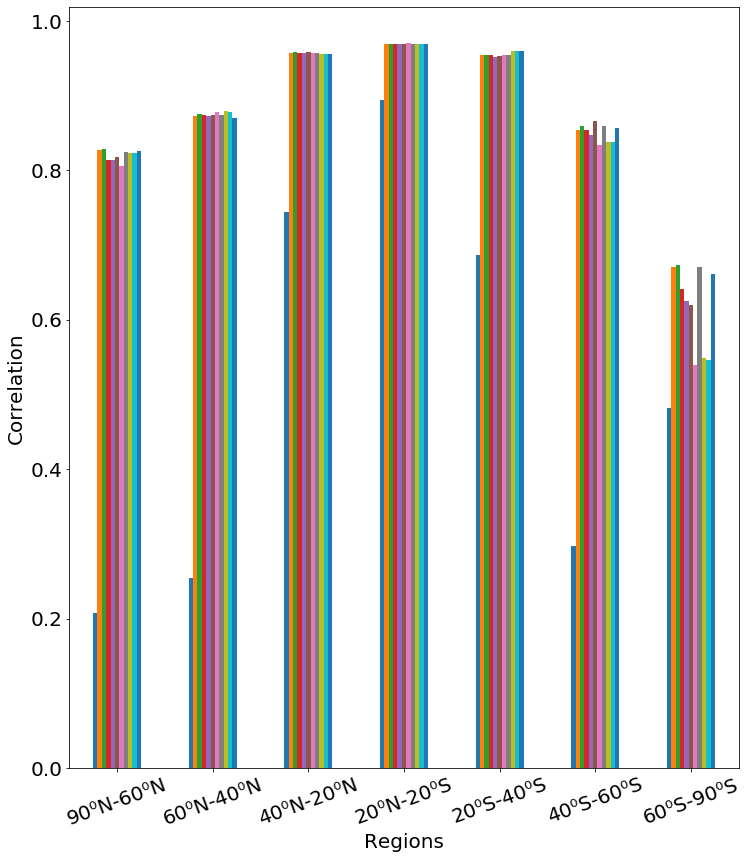

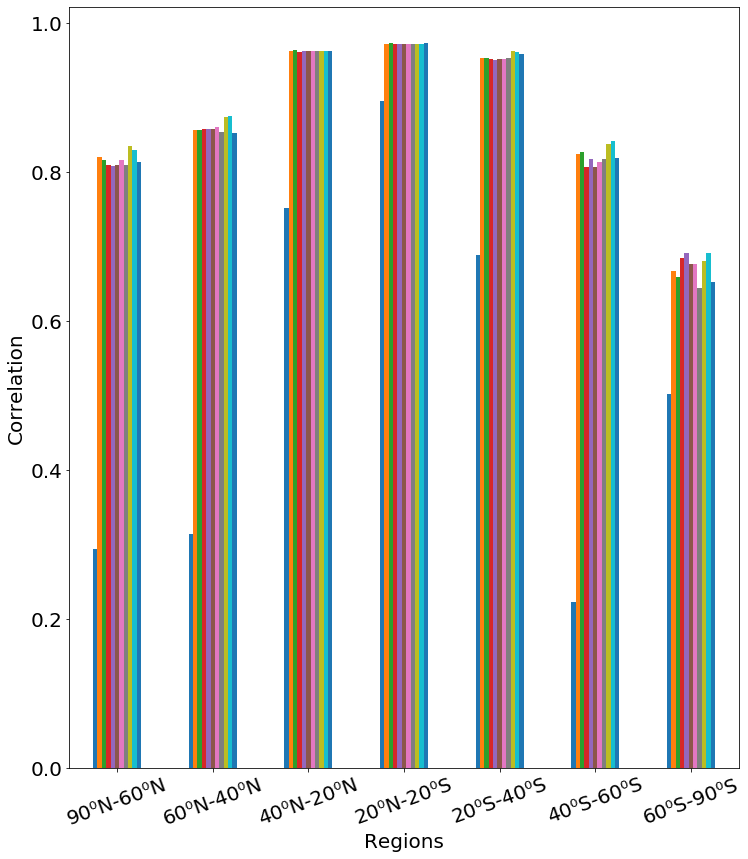

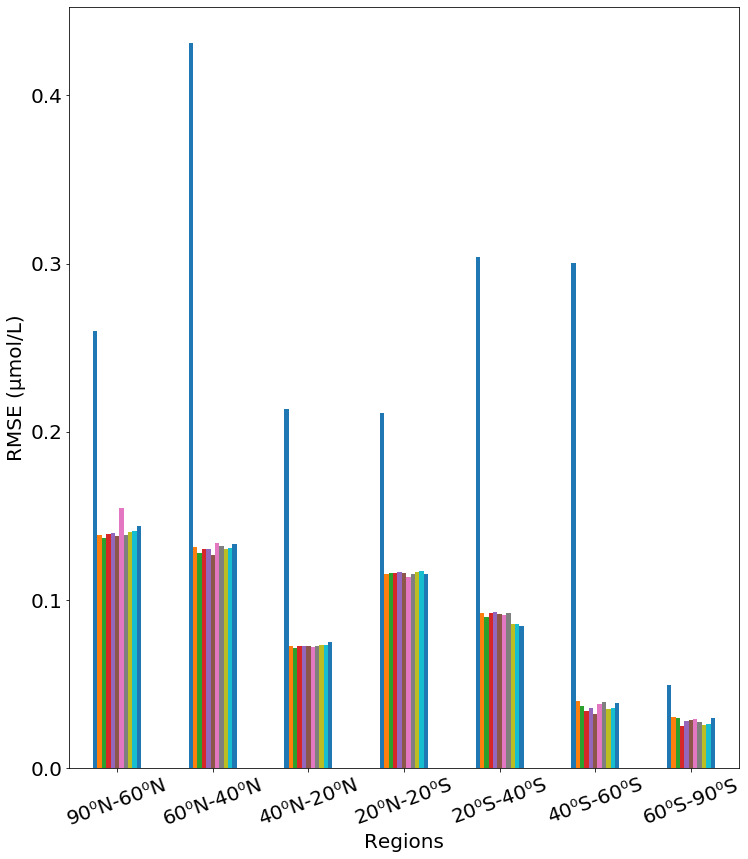

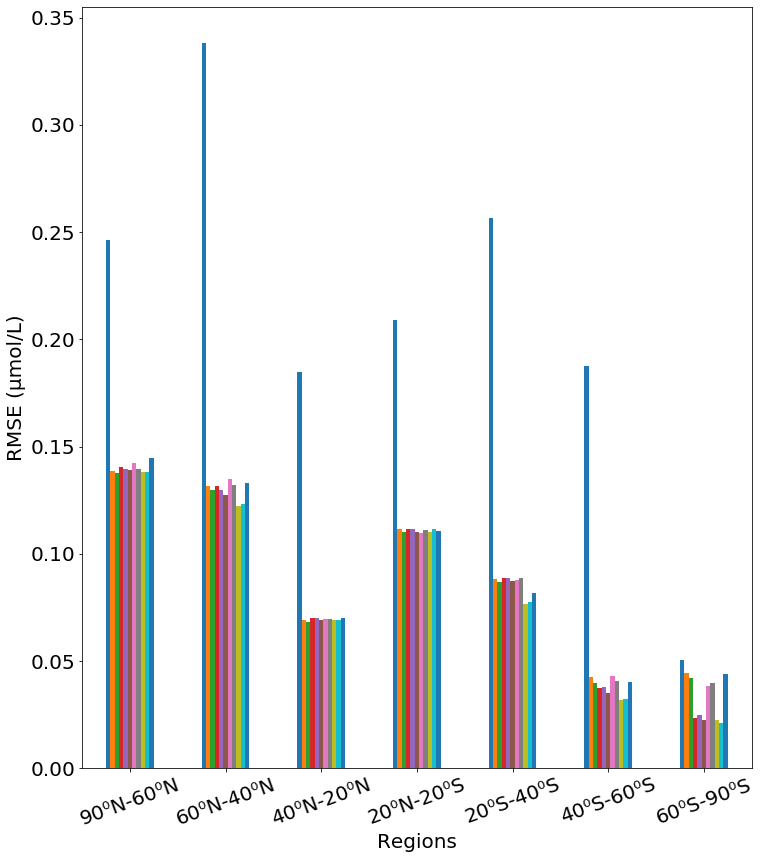

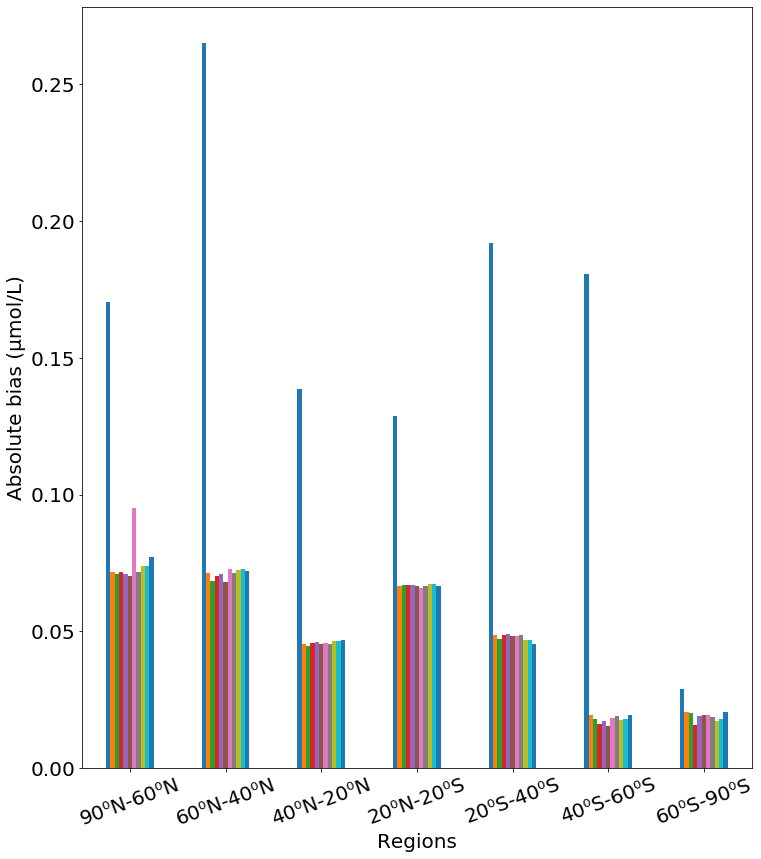

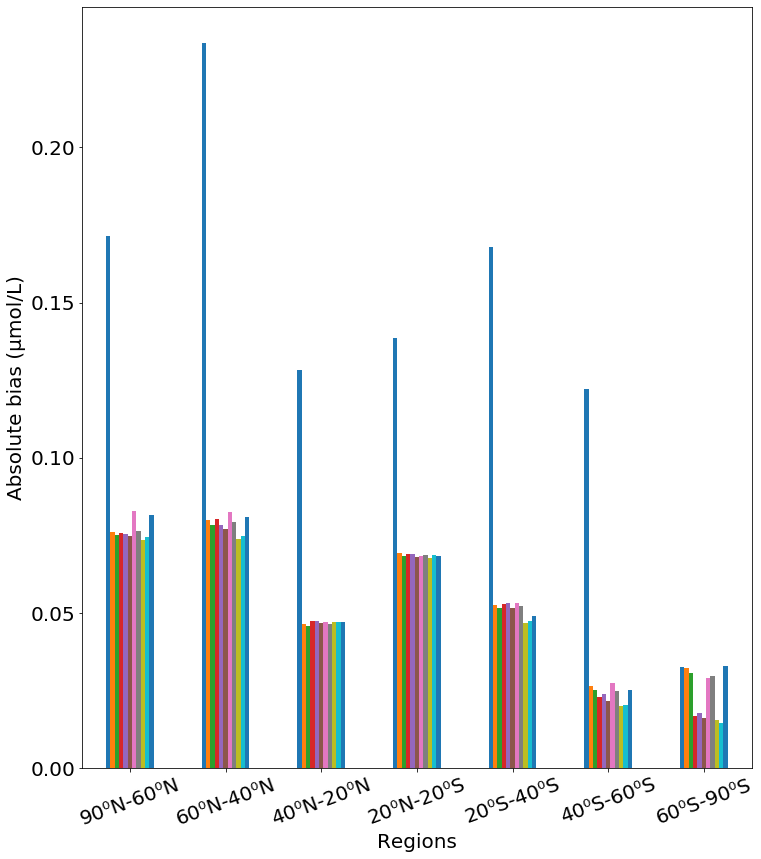

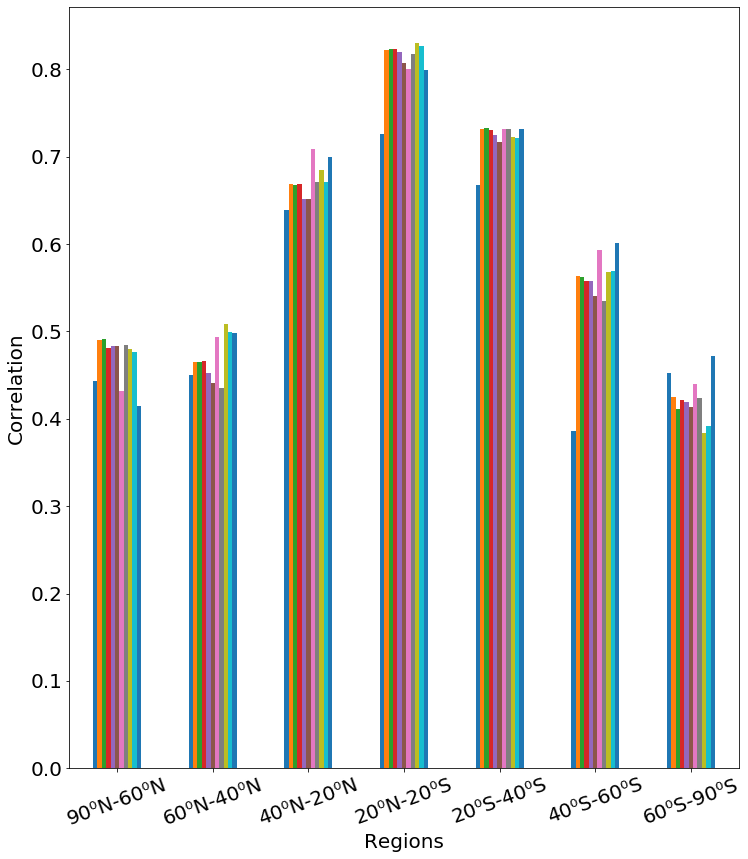

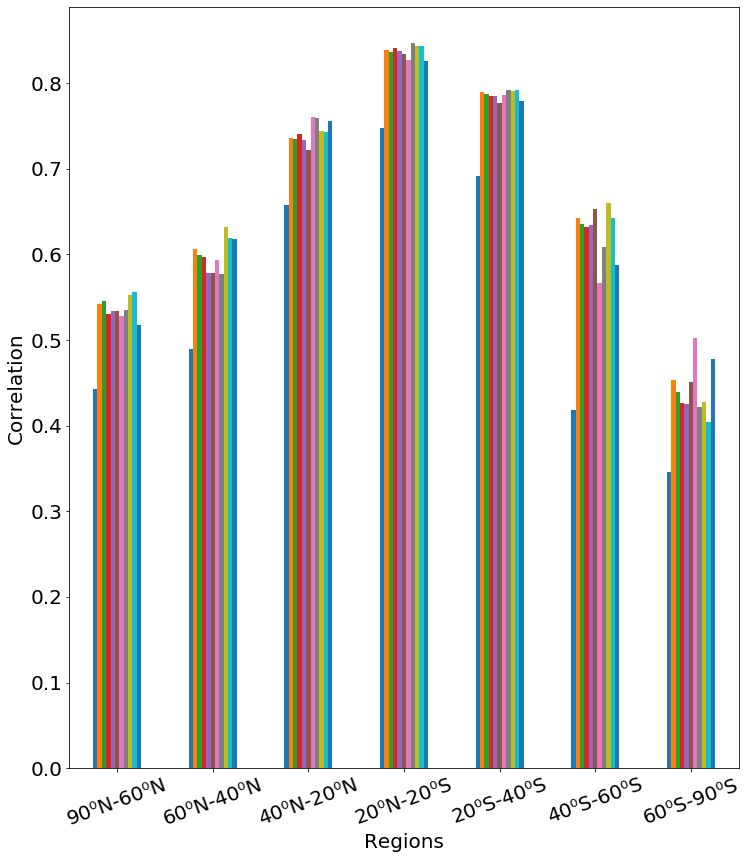

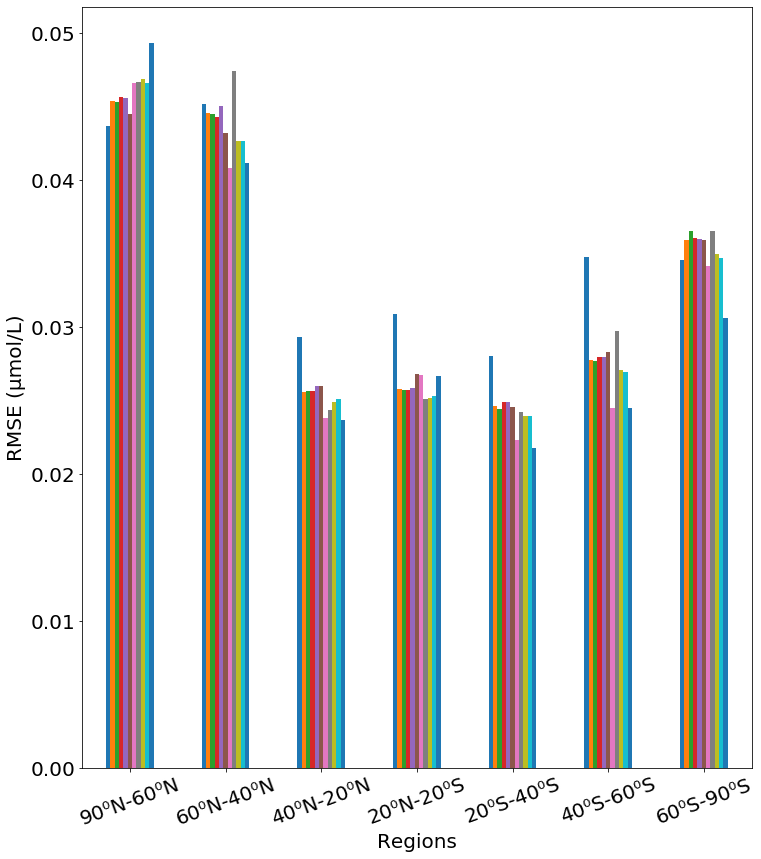

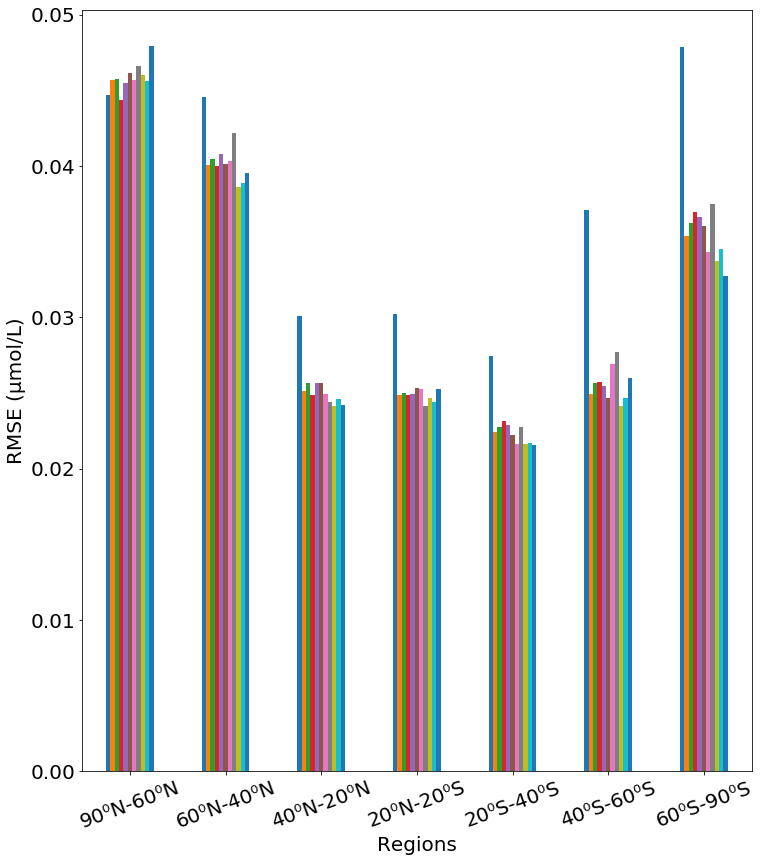

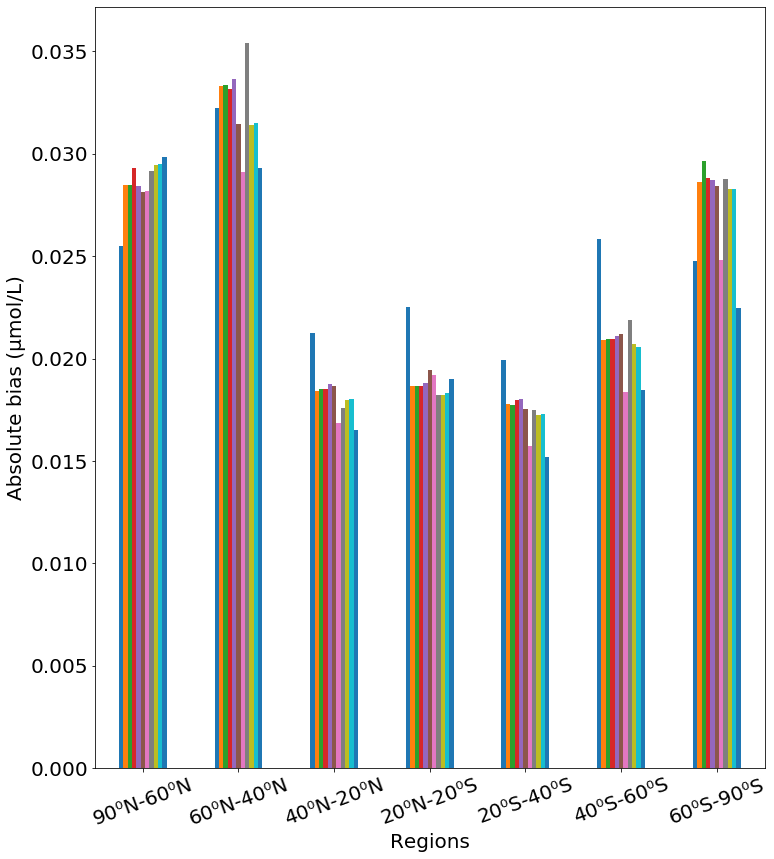

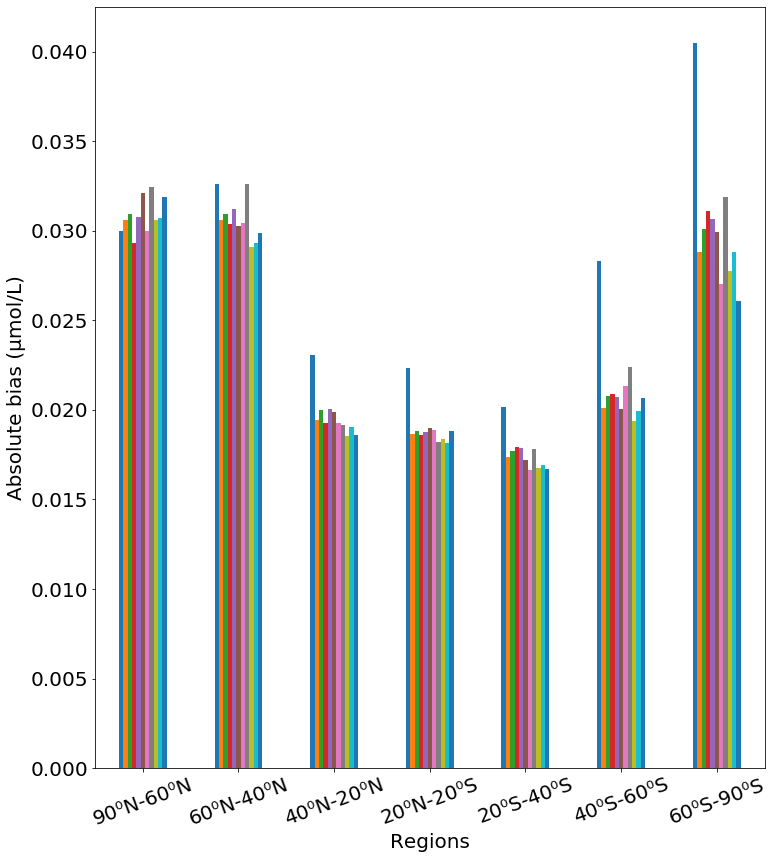

In [42]:
for var in var_reconstr:
    for n_set in names:
        if n_set == 'Corr':
            y_label = "Correlation"
        if n_set == 'RMSE':
            y_label = "RMSE (\u03BCmol/L)"
        if n_set == 'AB':
            y_label = "Absolute bias (\u03BCmol/L)"
        for method in methods:
            Plot_bar(eval('Stat_20092013_'+n_set+'_'+var+'_'+method),y_label,var+'_'+n_set+'_regional_'+method+'_2.png')

In [ ]:
#plot legends

In [41]:
Stat_20092013_RMSE_POC_xgb.rename(columns={'RMSE_POC_xgb_NoPFT': 'DS1', 'RMSE_POC_xgb_PhZMLD': 'DS5',\
                                           'RMSE_POC_xgb_PhZMLD_CHL': 'DS15','RMSE_POC_xgb_PhZMLD_NO3': 'DS16',\
                                           'RMSE_POC_xgb_PhZMLD_PO4': 'DS21', 'RMSE_POC_xgb_PhZMLD_chim': 'DS22',\
                                           'RMSE_POC_xgb_PhZMLD_latlon': 'DS23', 'RMSE_POC_xgb_PhZMLD_day': 'DS24',\
                                           'RMSE_POC_xgb_PhZMLD_back1': 'DS25', 'RMSE_POC_xgb_PhZMLD_back2': 'DS26',\
                                           'RMSE_POC_xgb_PhZMLD_back3': 'DS27'}, inplace=True)

/Users/annasommer/opt/miniconda3/lib/python3.7/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


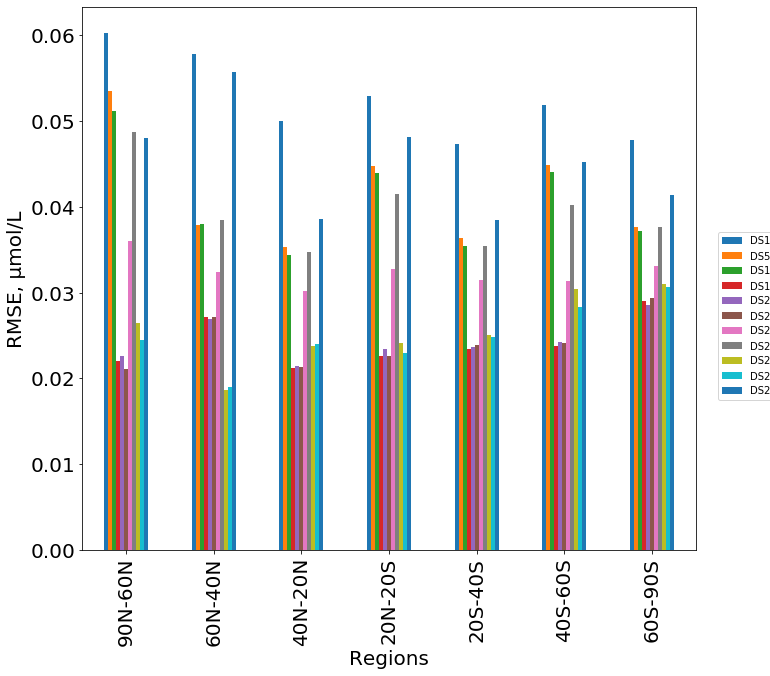

In [100]:
# Plot a bar chart using the DF
ax = Stat_20092013_RMSE_POC_xgb.plot(kind="bar",legend=False)
# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(11, 10)
# Change the axes labels
ax.set_ylabel("RMSE, \u03BCmol/L",fontsize=20)
ax.set_xlabel("Regions",fontsize=20)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
fig.legend(loc='center left', bbox_to_anchor=(0.9, 0.5))
fig.savefig("/Figures_Article/Legend_Stat_Reg_POC_2.png")

In [102]:
Stat_20092013_RMSE_GOC_xgb.rename(columns={'RMSE_GOC_xgb_NoPFT': 'DS1', 'RMSE_GOC_xgb_PhZMLD': 'DS5',\
                                           'RMSE_GOC_xgb_PhZBACMLD': 'DS8',\
                                           'RMSE_GOC_xgb_PhZMLD_latlon': 'DS15', 'RMSE_GOC_xgb_PhZMLD_day': 'DS16',\
                                           'RMSE_GOC_xgb_PhZMLD_only': 'DS17', 'RMSE_GOC_xgb_PhZMLD_CHL': 'DS21',\
                                           'RMSE_GOC_xgb_PhZMLD_PO4': 'DS23', 'RMSE_GOC_xgb_PhZMLD_back1': 'DS25',\
                                           'RMSE_GOC_xgb_PhZMLD_back2': 'DS26',\
                                           'RMSE_GOC_xgb_PhZMLD_back3': 'DS27'}, inplace=True)

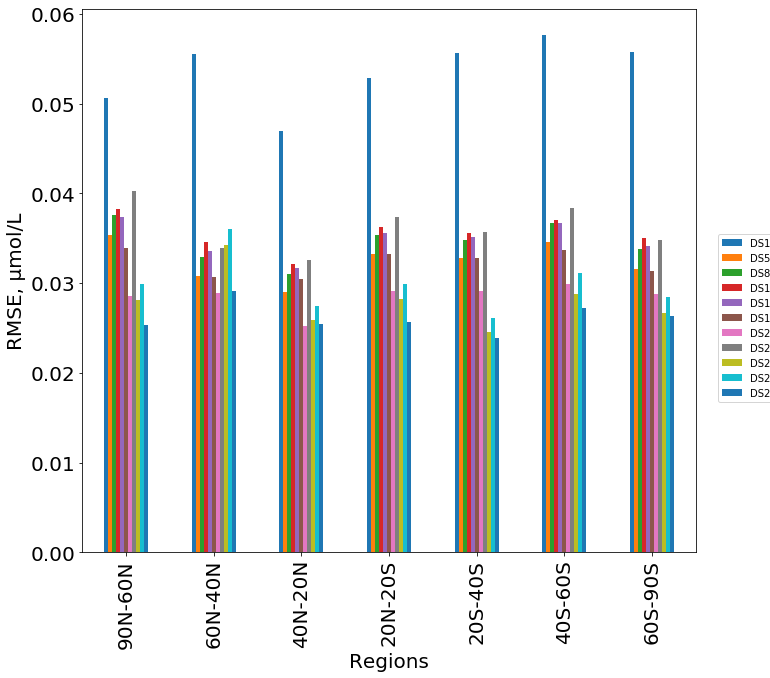

In [103]:
# Plot a bar chart using the DF
ax = Stat_20092013_RMSE_GOC_xgb.plot(kind="bar",legend=False)
# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(11, 10)
# Change the axes labels
ax.set_ylabel("RMSE, \u03BCmol/L",fontsize=20)
ax.set_xlabel("Regions",fontsize=20)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
fig.legend(loc='center left', bbox_to_anchor=(0.9, 0.5))
fig.savefig("/Figures_Article/Legend_Stat_Reg_GOC_2.png")